In [3]:
import pandas as pd
import numpy as np
from scipy import stats 

In [7]:
#Create a Datatime index containing all the weekdays days of year 2019 and assign a random number to each of them in a dataframe.
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

date_today = datetime.now()
#print(date_today)
ndays = 5
df = pd.DataFrame({'date': [date_today + timedelta(days=x) for x in range(ndays)], 
                   'test': pd.Series(np.random.randn(ndays))})
df.set_index('date')

,test
date,
2020-02-29 21:22:23.032411,0.665140
2020-03-01 21:22:23.032411,1.661070
2020-03-02 21:22:23.032411,0.081065
2020-03-03 21:22:23.032411,0.518516
2020-03-04 21:22:23.032411,0.138130


In [5]:
#2 Given Pandas series , height = [23,42,55] and weight = [71,32,48] . Create a dataframe with height and weight as column names.
height_A = pd.Series([23,42,55])
weight_A = pd.Series([71,32,48])
df_A = pd.DataFrame({'Height': height_A ,'Weight': weight_A})
display(df_A)

,Height,Weight
0,23,71
1,42,32
2,55,48


In [49]:
#3 How to get the items of series A not present in series B .From ser1 remove items present in ser2.
ser1 = pd.Series([2,3,4,5])
ser2 = pd.Series([5,6,7,8])
ser1[~ser1.isin(ser2)]

0    2
1    3
2    4
dtype: int64

In [116]:
t_df=pd.read_csv(r"C:\Users\Rajat\Machine Learning\machine-learning-ex\machine-learning-ex\Datasets\titanic.csv")
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#4 Compute the minimum, 25th percentile, median, 75th, and maximum of age in titanic dataset
#t_df['Age'].quantile(np.linspace(0, 1, 5),'lower')
t_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
#5 How to get frequency counts of unique items of a series? Calculate the frequency counts of ‘SibSp’ column in titanic Dataset
#t_df['SibSp'].value_counts()
t_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

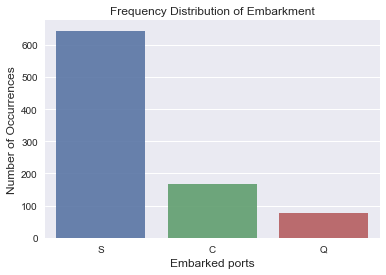

In [40]:
#6 Keep only top 2 most frequent values as it is and replace everything else as ‘Other’ in ‘Embarked’ column of titanic dataset
#t_df.Embarked.value_counts()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Embarked_count = t_df.Embarked.value_counts()
sns.set(style="darkgrid")
sns.barplot(Embarked_count.index, Embarked_count.values, alpha=0.9)
plt.title('Frequency Distribution of Embarkment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Embarked ports', fontsize=12)
plt.show()

In [173]:
a=t_df.Embarked.value_counts(normalize = True)
m = (a/a.sum() *100).lt(1)
t_df['Embarked'] = np.where(t_df.Embarked.isin(a[m].index),'Other',t_df['Embarked'])
0

0      S
1      C
2      S
3      S
4      S
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
18     S
20     S
21     S
22     Q
23     S
24     S
25     S
27     S
30     C
33     S
34     C
35     S
37     S
38     S
      ..
856    S
857    S
858    C
860    S
861    S
862    S
864    S
865    S
866    C
867    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 714, dtype: object

In [56]:
#7 Bin the price column in titanic data set into 5 equal groups and get counts of each bin
pd.qcut(t_df['Fare'], q=5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [58]:
# Watch The Difference
pd.cut(t_df['Fare'], bins=5).value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [64]:
#8 Count the number of missing values in each column?
#1) t_df.isnull().sum()
#2) for Percantage of Missing values
     #t_missing = t_df.isnull()
     #t_missing.mean()*100
#3) For a table use the Following
percent_missing = t_df.isnull().sum() * 100 / len(t_df)
Missing_Value_count11=t_df.isnull().sum()
missing_value_df = pd.DataFrame({'Missing_Value_count':Missing_Value_count11,
                                             'percent_missing': percent_missing})
display(missing_value_df)

,Missing_Value_count,percent_missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [91]:
#9 Get the row number of the 5th largest value in the Age column of titanic dataset?
t_df.nlargest(5, ['Age']).index[4]  

116

In [117]:
#10 Normalize all columns in a dataframe?
# Numerical cols
num_cols = t_df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove('PassengerId')                         ##Pop is used if Index is known 
#dropping the rows with missing Age Values 
t_df = t_df.dropna(axis=0, subset=['Age'])
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
t_df[num_cols] = minmax.fit_transform(t_df[num_cols].values)
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.2,0.000000,A/5 21171,0.014151,NaN,S
1,2,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.2,0.000000,PC 17599,0.139136,C85,C
2,3,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.0,0.000000,STON/O2. 3101282,0.015469,NaN,S
3,4,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.2,0.000000,113803,0.103644,C123,S
4,5,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.0,0.000000,373450,0.015713,NaN,S
6,7,0.0,0.0,"McCarthy, Mr. Timothy J",male,0.673285,0.0,0.000000,17463,0.101229,E46,S
7,8,0.0,1.0,"Palsson, Master. Gosta Leonard",male,0.019854,0.6,0.166667,349909,0.041136,NaN,S
8,9,1.0,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0.0,0.333333,347742,0.021731,NaN,S
9,10,1.0,0.5,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,0.2,0.000000,237736,0.058694,NaN,C
10,11,1.0,1.0,"Sandstrom, Miss. Marguerite Rut",female,0.044986,0.2,0.166667,PP 9549,0.032596,G6,S


In [120]:
#11 Get the indices of items of ser2 in ser1 as a list.
ser1 = pd.Series([10,9,6,5,3,1,12,8,13])
ser2 = pd.Series([1,3,10,13])
ser1[ser1.isin(ser2)].index

Int64Index([0, 4, 5, 8], dtype='int64')

In [123]:
#12  How to convert a series of date-strings to a timeseries?
ser = pd.Series(['01 Jan 2010','02-02-11','20120303','2013/4/4','2014-5-5','2015-6-6T12:20'])
print(pd.to_datetime(ser))

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]


In [134]:
#13 Get the day of month, week number, day of year and day of week from ser.
from dateutil.parser import parse
ser = pd.Series(['01 Jan 2010','02-02-11','20120303','2013/4/4','2014-5-5','2015-6-6T12:20'])
ser1 = ser.map(lambda x: parse(x))   #Approach 1 to convert to timeSeries so that everything follows a schema
ser2 = pd.to_datetime(ser)           #Approach 2 to convert to timeSeries so that everything follows a schema and fregular Pattern
print("Day of month:")
print(ser2.dt.day.tolist())
print("Week number:")
print(ser2.dt.weekofyear.tolist())
print("Day of year:")
print(ser2.dt.dayofyear.tolist())
print("Day of week:")
print(ser2.dt.weekday_name.tolist())

Day of month:
[1, 2, 3, 4, 5, 6]
Week number:
[53, 5, 9, 14, 19, 23]
Day of year:
[1, 33, 63, 94, 125, 157]
Day of week:
['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


In [147]:
#14 Compute the euclidean distance between series (points) p and q, without using a packaged formula.
import math
p =pd.Series([1,2,3,4,5,6,7,8,9,10]) 
q =pd.Series([10,9,8,7,6,5,4,3,2,1])
distance = format(math.sqrt(sum([(a - b) ** 2 for a, b in zip(p, q)])),'.3f')
print(distance)

18.166


In [152]:
#15  How to create a TimeSeries starting ‘2000-01-01’ and 10 weekends (saturdays/sundays)
a = pd.date_range('2000-01-01',periods = 10, freq = 'W-Sun')
b = pd.date_range('2000-01-01',periods = 10, freq = 'W-Sat')

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29', '2000-02-05', '2000-02-12', '2000-02-19',
               '2000-02-26', '2000-03-04'],
              dtype='datetime64[ns]', freq='W-SAT')

In [137]:
#16 Import every 50th row of BostonHousing dataset as a dataframe.
bostondf = pd.read_csv(r"C:\Users\Rajat\Machine Learning\machine-learning-ex\machine-learning-ex\Datasets\boston_house_price.csv")
bostondf.iloc[::50,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4
